In [1]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import dataset
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#Select the features to cluster
X=df.iloc[:,3:].values


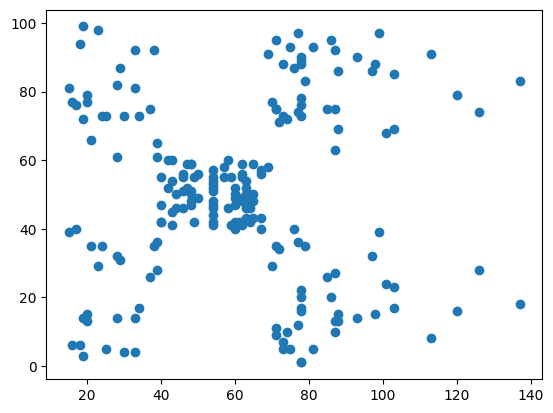

In [5]:
plt.scatter(X[:,0],X[:,1])

In [6]:
# Finding optimal number of clusters-Elbow Method
from sklearn.cluster import KMeans
#intialise the list to store wcss values
wcss=[]
# Try different values of K (from 1 to 10) and calculate WCSS for each K
#K-Means++ to Choose Initial Cluster Centroids for K-Means Clustering
for k in range(1,11): #k= 1 to 10
    kmeans=KMeans(n_clusters=k,init="k-means++",random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    


C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.

In [7]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30259.65720728547,
 25050.832307547527,
 21862.09267218289,
 19657.783608703958]

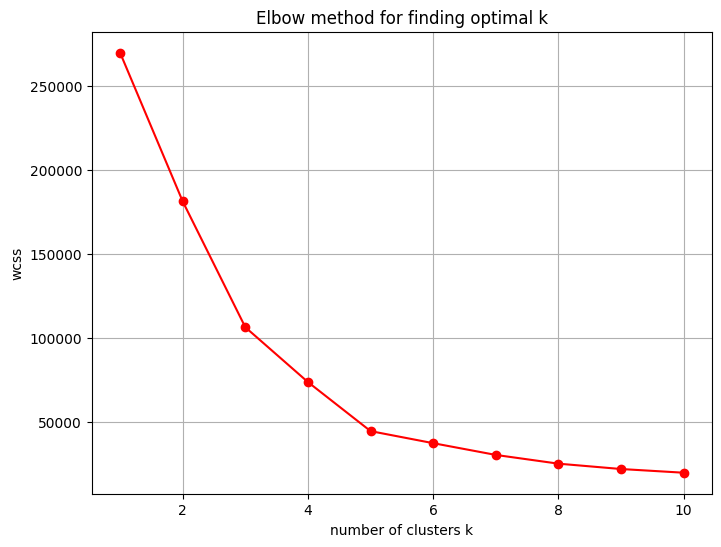

In [8]:
#plot the elbow curve
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker="o",color="red")
plt.title("Elbow method for finding optimal k")
plt.xlabel("number of clusters k")
plt.ylabel("wcss")
plt.grid()
plt.show()

In [9]:
#Train the model on dataset using optimal cluster k value
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=0)
y_kmeans=kmeans.fit_predict(X)

C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
#Visualize the clusters
X[y_kmeans==0,0]

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76], dtype=int64)

In [11]:
X[y_kmeans==2,1]

array([29, 11,  9,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,  5,
       26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28,
       18], dtype=int64)

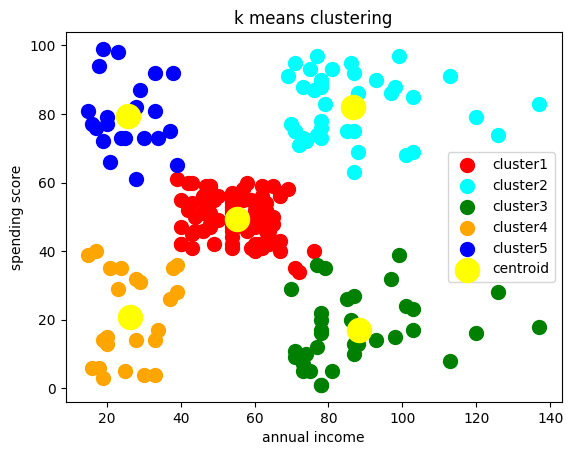

In [12]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],color="red",s=100,label="cluster1")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],color="cyan",s=100,label="cluster2")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],color="green",s=100,label="cluster3")
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],color="orange",s=100,label="cluster4")
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],color="blue",s=100,label="cluster5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow",s=300,label="centroid")
plt.title("k means clustering")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.legend()
